In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#jupyter intelisense
%config IPCompleter.greedy=True

# RMS Titanic

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912 after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.  	[wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)

<img src="https://www.biography.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTI5MzY2NjIzMTA1NTkxOTM5/titanic-3jpg.jpg" />

## Who were more likely to suvive the RMS Titanic?

That is the question we want to answer in today's CAPSTONE. First we need to load the data and discover what information do we have.

In [2]:
gender_df = pd.read_csv('downloads/titanic/gender_submission.csv')
test_df = pd.read_csv('downloads/titanic/test.csv')
train_df = pd.read_csv('downloads/titanic/train.csv')

#### Data
| Variable | Definition | Key |
|------|------|------|
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class |1 = 1st, 2 = 2nd, 3 = 3rd |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |	  |
| Parch | # of parents / children aboard the Titanic |	 |
| Ticket | Ticket number |	 |
| Fare | Passenger fare |	 |
| Cabin | Cabin number |	 |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

##### Additional Notes
**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
print('Gender Submission columns with null values:\n', gender_df.isnull().sum())
print("-"*50)
gender_df.sample(5)

Gender Submission columns with null values:
 PassengerId    0
Survived       0
dtype: int64
--------------------------------------------------


,PassengerId,Survived
248,1140,1
58,950,0
270,1162,0
72,964,1
70,962,1


In [4]:
print (test_df.info())
print("-"*50)
print('Test columns with null values:\n', test_df.isnull().sum())
print("-"*50)
test_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
--------------------------------------------------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,1043,3,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
150,1042,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C54,C
323,1215,1,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S
268,1160,3,"Howard, Miss. May Elizabeth",female,NaN,0,0,A. 2. 39186,8.0500,NaN,S
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S
170,1062,3,"Lithman, Mr. Simon",male,NaN,0,0,S.O./P.P. 251,7.5500,NaN,S
328,1220,2,"Clarke, Mr. Charles Valentine",male,29.0,1,0,2003,26.0000,NaN,S
65,957,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",female,NaN,0,0,F.C.C. 13534,21.0000,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [5]:
print (train_df.info())
print("-"*50)
print('Train columns with null values:\n', train_df.isnull().sum())
print("-"*50)
train_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
--------------------------------------------------
Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


You may noticed in our test data, we don't have the **survived column**. <br/>
Let's combine the data and process them at the same time

In [6]:
data_df = pd.merge(train_df, test_df, on='PassengerId', how='left')

In [7]:
print (data_df.info())
print("-"*50)
print('Columns with null values:\n', data_df.isnull().sum())
print("-"*50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass_x       891 non-null int64
Name_x         891 non-null object
Sex_x          891 non-null object
Age_x          714 non-null float64
SibSp_x        891 non-null int64
Parch_x        891 non-null int64
Ticket_x       891 non-null object
Fare_x         891 non-null float64
Cabin_x        204 non-null object
Embarked_x     889 non-null object
Pclass_y       0 non-null float64
Name_y         0 non-null object
Sex_y          0 non-null object
Age_y          0 non-null float64
SibSp_y        0 non-null float64
Parch_y        0 non-null float64
Ticket_y       0 non-null object
Fare_y         0 non-null float64
Cabin_y        0 non-null object
Embarked_y     0 non-null object
dtypes: float64(7), int64(5), object(10)
memory usage: 160.1+ KB
None
--------------------------------------------------
Columns with null valu

In [8]:
#drop empty data
data_df = data_df.drop(["Pclass_y", "Name_y", "Sex_y","Age_y","SibSp_y","Parch_y","Ticket_y",
                       "Fare_y","Cabin_y","Embarked_y"], axis=1)

In [9]:
#check how many missing information per column
print('Columns with null values:\n', data_df.isnull().sum())

Columns with null values:
 PassengerId      0
Survived         0
Pclass_x         0
Name_x           0
Sex_x            0
Age_x          177
SibSp_x          0
Parch_x          0
Ticket_x         0
Fare_x           0
Cabin_x        687
Embarked_x       2
dtype: int64


In [10]:
#change text to more readable column name
data_df.columns = data_df.columns.str.strip().str.lower().str.replace(' ', '').str.replace('_x', '')

In [11]:
#verify that the columns has the same format
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None


In [12]:
#view unique values per column
for column_name in data_df.columns:
    print("Unique values in column {} are: {}".format(column_name, data_df[column_name].unique()))

Unique values in column passengerid are: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 2

In [13]:
survived  = pd.DataFrame(data_df, columns = ['survived', 'sex','age','pclass']) 

### Survival Rate

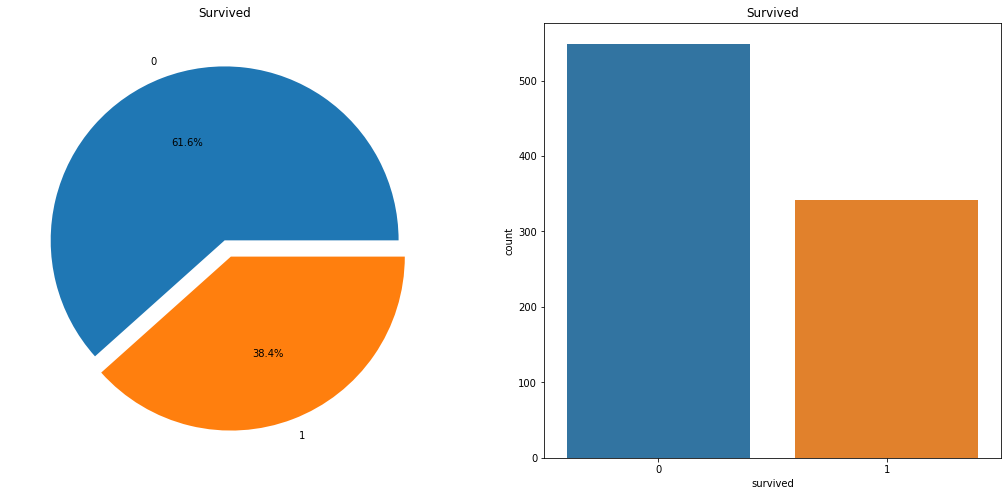

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
survived['survived'].value_counts().plot.pie(explode=[0,0.1],
                                               autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('survived',data=survived,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

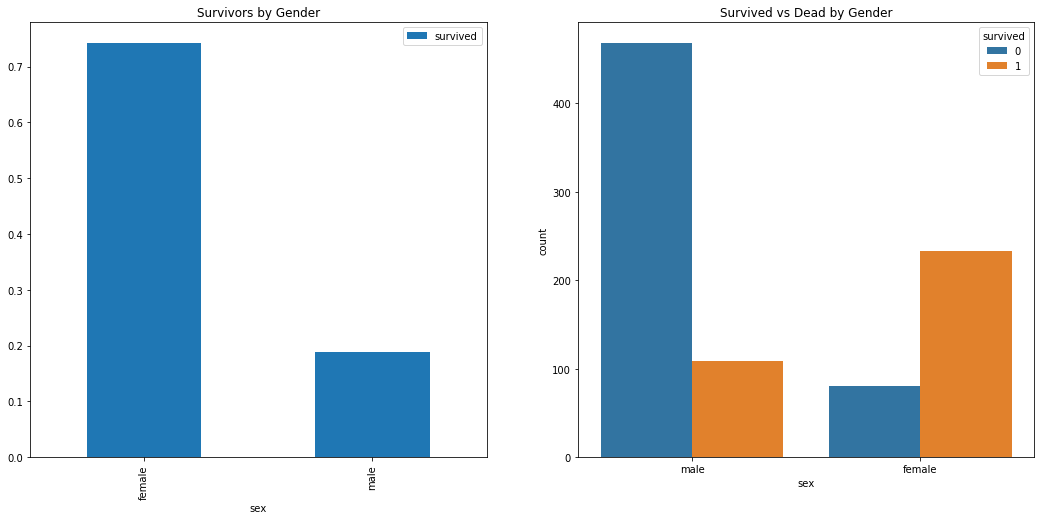

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
survived[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by Gender')
sns.countplot('sex',hue='survived',data=survived,ax=ax[1])
ax[1].set_title('Survived vs Dead by Gender')
plt.show()

In 1921 the amount of lifeboats are within the guidelines at that time. Since then we've made a change to make sure that we have enough lifeboat to all passager plus reserves. We know based from books and movies the women and children we're first to get rescued. This data shows clearly what happened that faithful night. [full article](https://www.claymaitland.com/2012/10/02/the-titanic-and-evacuation-survival-and-rescue/)

---
### Survival Rate by Age

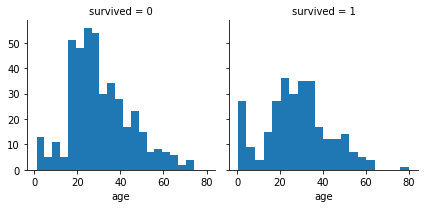

In [16]:
g = sns.FacetGrid(data_df, col='survived')
g.map(plt.hist, 'age', bins=20)
plt.show()

#### Female Survival Rate by Age

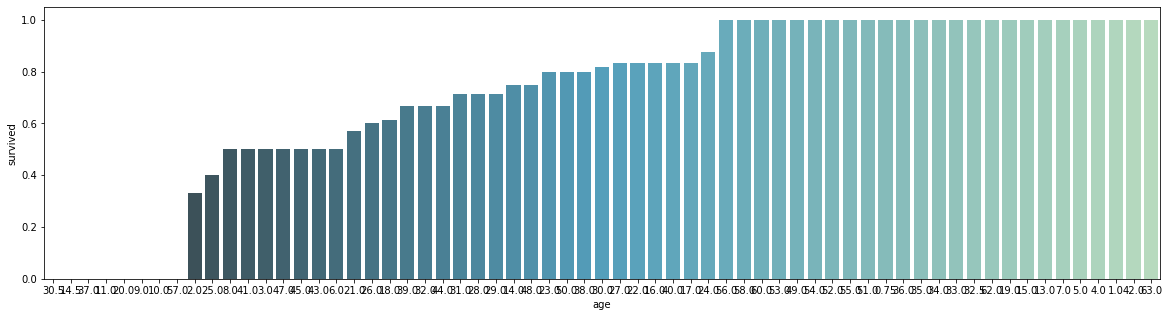

In [17]:
survivedbyage = survived[survived.sex == 'female'].pivot_table(index=['age'],
                                                         values=["survived"], aggfunc="mean")

survivedbya = survivedbyage.reset_index()
plt.rcParams['figure.figsize'] = [20, 5]

result = survivedbya.groupby(["age"])['survived'].aggregate(np.median).reset_index().sort_values('survived')
sns.barplot(x='age', y="survived", data=survivedbya, palette='GnBu_d', order=result['age'])

plt.show()

---
### Survival Rate by Class

In [18]:
#survival regardless of gender
data_df[['pclass', 'survived']].groupby(['pclass'], 
                                        as_index=False).mean().sort_values(by='survived', 
                                                                           ascending=False)

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### Female Survival Rate by Class

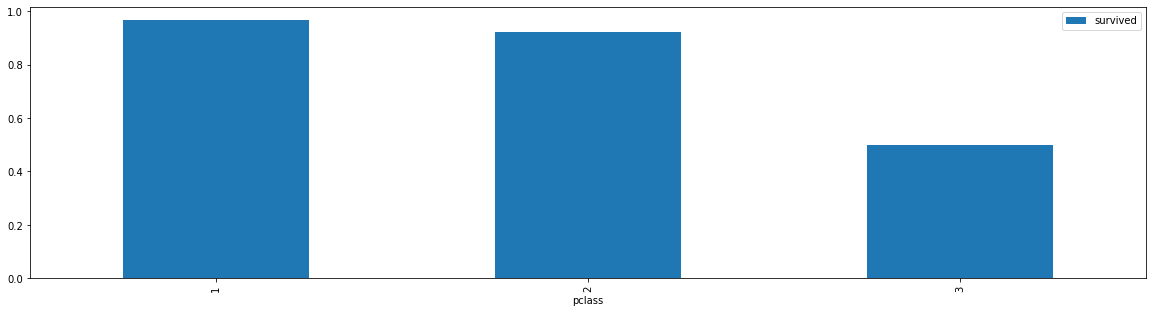

In [19]:
survivedbyclass = survived[survived.sex == 'female'].pivot_table(index=['pclass'],
                                                         values=["survived"], aggfunc="mean")
survivedbyc = survivedbyclass.reset_index()
survivedbyc.plot.bar(x='pclass', y='survived')
plt.show()

#### Male Survival Rate by Class

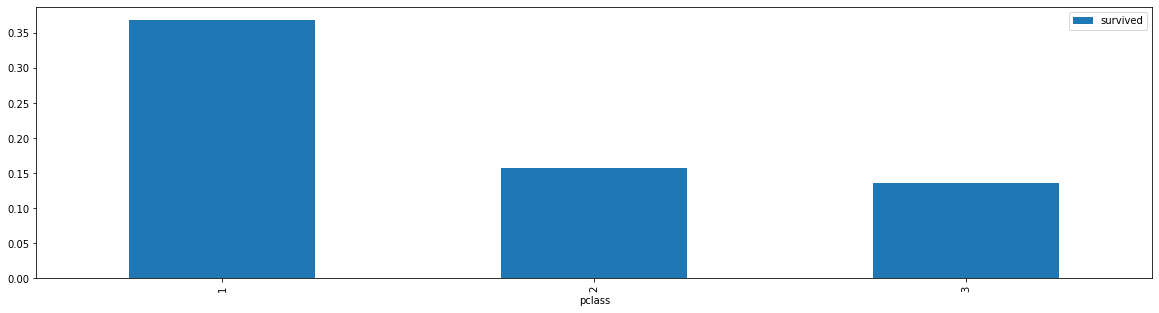

In [20]:
survivedbyclass = survived[survived.sex == 'male'].pivot_table(index=['pclass'],
                                                         values=["survived"], aggfunc="mean")
survivedbyc = survivedbyclass.reset_index()
survivedbyc.plot.bar(x='pclass', y='survived')
plt.show()

In [21]:
data_df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


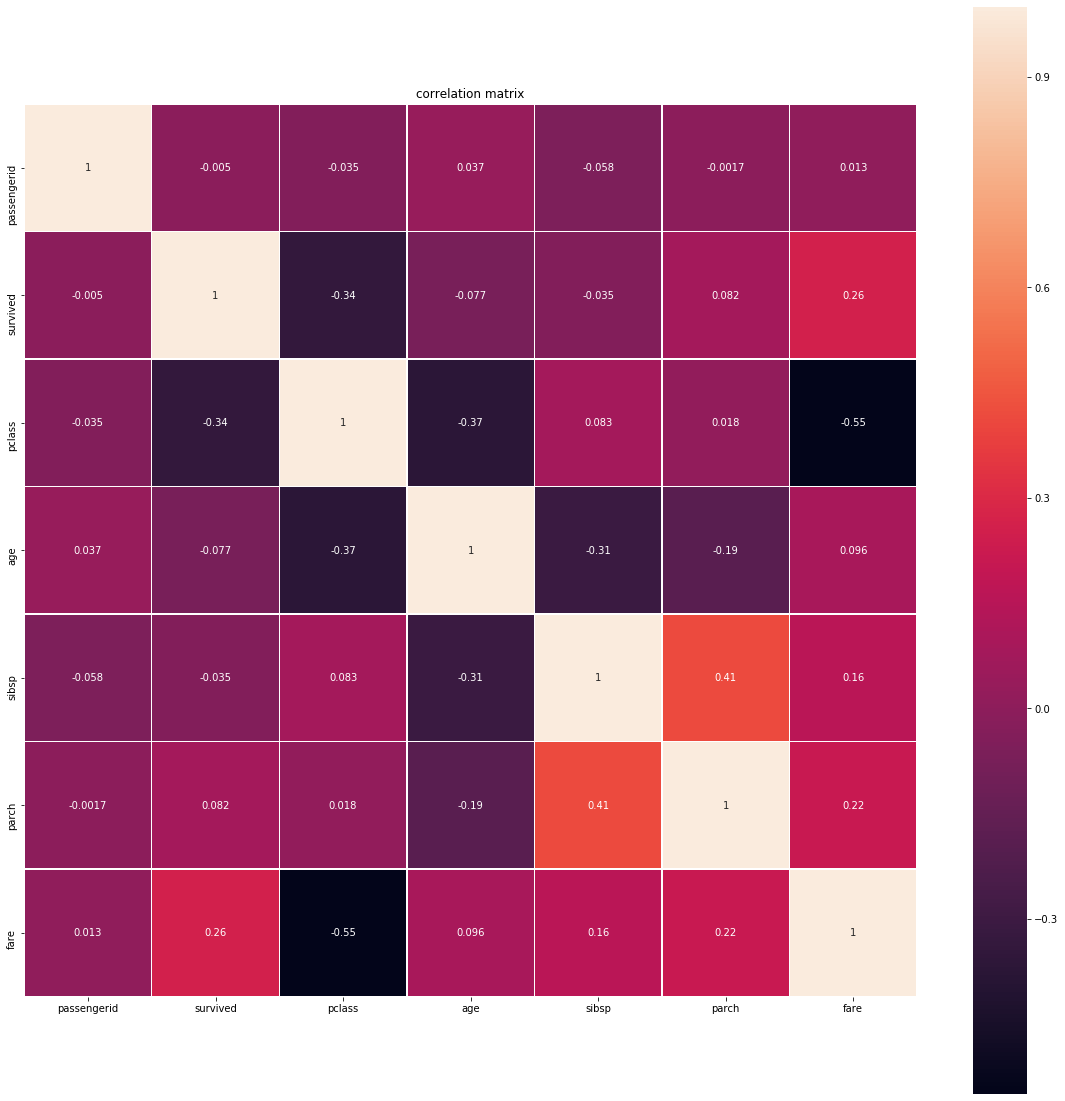

In [22]:
# make the correlation matrices.
data_cmat = data_df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(data_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

There is no direct correlation in our current data. We need to create new features in our existing dataset to make an intelligent assessment.

---
### Creating new feature extracting from existing

In [26]:
data_df['title']=0
for dataset in data_df:
    dataset['title'] = dataset['name'].str.split(", ", 
                                                 expand=True)[1].str.split(".", 
                                                                           expand=True)[0]

print("-"*20)
print(data_df['title'].value_counts())

TypeError: string indices must be integers

In [27]:
for dataset in data_df:
    dataset['sex'] = dataset['sex'].map( {'female': 1, 'male': 0} ).astype(int)

data_df.head()

TypeError: string indices must be integers

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


# Y is the target variable
Y = data_df['survived']
# X is the feature set
X = data_df[['fare']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

## How you chose your model specification and what alternatives you compared it to?

The main question is to predict who survives any tragic accident in the sea. This would lead us to one major model to use which is the linear regression model.

## The practical uses of your model for an audience of interest?

Safety personnell is my target audience for this Model. Determining which passengers less likely to survive would provide us information which resources is more needed in a time of crisis.

## Any weak points or shortcomings of your model?

Using just the original data alone is not enough to make a correlation. We need to breakdown the original information to create data that is relevate to our topic.